In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
pd.set_option('max_columns', None)

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
df.loc[:,df.isnull().sum() != 0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
Electrical      1459 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
dtypes: float64(3), object(16)
memory usage: 216.8+ KB


There are 19 features with missing values.

In [10]:
# LotFrontage
df.loc[:,['LotFrontage','LotArea','LotShape']].groupby(by='LotShape').median()

,LotFrontage,LotArea
LotShape,,
IR1,74.0,10638
IR2,57.5,13682
IR3,150.0,19078
Reg,67.0,8800


In [11]:
df.loc[df.LotFrontage.isnull() & (df.LotShape == 'IR1'),'LotFrontage'] = 74.0
df.loc[df.LotFrontage.isnull() & (df.LotShape == 'IR2'),'LotFrontage'] = 57.5
df.loc[df.LotFrontage.isnull() & (df.LotShape == 'IR3'),'LotFrontage'] = 150.0
df.loc[df.LotFrontage.isnull() & (df.LotShape == 'Reg'),'LotFrontage'] = 67.0

In [12]:
# Alley  Very High null values.
df.drop('Alley', axis=1, inplace=True)

In [13]:
# MasVnrType & MasVnrArea
df.loc[df.MasVnrArea.isnull(), ['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [14]:
df.loc[df.MasVnrType == 'None', ['MasVnrArea','MasVnrType']].head()

,MasVnrArea,MasVnrType
1,0.0,None
3,0.0,None
5,0.0,None
8,0.0,None
9,0.0,None


In [15]:
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

We can safely impute these nulls with None and 0 respectively for Masonary Veneer Type and Area.

In [16]:
df.loc[df.MasVnrType.isnull(),'MasVnrType'] = 'None'

In [17]:
df.loc[df.MasVnrArea.isnull(),'MasVnrArea'] = 0

In [18]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
df.loc[df.BsmtQual.isnull() , ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = 'NA'

In [19]:
df.loc[df.BsmtFinType2.isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
332,Gd,TA,No,GLQ,1124,NaN,479


In [20]:
df.loc[:,['BsmtFinType2','BsmtFinSF2']].groupby(by='BsmtFinType2').mean()

,BsmtFinSF2
BsmtFinType2,
ALQ,626.157895
BLQ,329.909091
GLQ,658.000000
LwQ,310.739130
NA,0.000000
Rec,392.462963
Unf,0.000000


In [21]:
df.loc[df.BsmtFinType2.isnull(),'BsmtFinType2'] = 'Rec'

In [22]:
df.BsmtExposure.value_counts(dropna=False)

No     953
Av     221
Gd     134
Mn     114
NA      37
NaN      1
Name: BsmtExposure, dtype: int64

In [23]:
df.loc[df.BsmtExposure.isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
948,Gd,TA,NaN,Unf,0,Unf,0


In [24]:
df.loc[df.BsmtExposure.isnull(),'BsmtExposure'] = 'No'

In [25]:
# Electrical
df['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [26]:
df.loc[df['Electrical'].isnull(),'Electrical'] = 'SBrkr'

In [27]:
# Fireplace
df.loc[df['FireplaceQu'].isnull(),['Fireplaces','FireplaceQu']].sum()

Fireplaces     0.0
FireplaceQu    0.0
dtype: float64

Fireplace Quality is null because fireplace is not present. We simple replace these with NA = No Fireplace

In [28]:
df.loc[df['FireplaceQu'].isnull(),'FireplaceQu'] = 'NA'

In [29]:
# Garage related features
df.loc[df['GarageType'].isnull(),['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']].sum()

GarageType      0.0
GarageYrBlt     0.0
GarageFinish    0.0
GarageCars      0.0
GarageArea      0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64

Null values are present because no Garage is present as GarageCars feature has 0 value.

In [30]:
df.loc[df.GarageType.isnull() , ['GarageType','GarageFinish','GarageQual','GarageCond']] = 'NA'

In [31]:
df.loc[df.GarageYrBlt.notnull() , 'GarageYrBlt'].median()

1980.0

In [32]:
# For now i am putting -1.0 for garages never built.
df.loc[df.GarageYrBlt.isnull() , 'GarageYrBlt'] = 1980.0

In [33]:
# Pool
df.loc[df['PoolQC'].isnull(), ['PoolArea', 'PoolQC']].sum()

PoolArea    0.0
PoolQC      0.0
dtype: float64

Here pool quality is missing because pool is not present. We will impute this with NA = No Pool

In [34]:
df.loc[df['PoolQC'].isnull(), 'PoolQC'] = 'NA'

In [35]:
# Fence
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Assuming Fence data is null for cases where fence is not present. Imputing with NA = No Fence

In [36]:
df.loc[df.Fence.isnull(),'Fence'] = 'NA'

In [37]:
# MiscFeature
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [38]:
df.loc[df.MiscFeature.isnull(), ['MiscFeature','MiscVal']].sum()

MiscFeature    0.0
MiscVal        0.0
dtype: float64

MiscFeature is null in cases where no Miscellaneous feature is present and therefore miscvalue is 0.

In [39]:
df.loc[df.MiscFeature.isnull(), 'MiscFeature'] = 'NA'

#### Entire Dataframe is now rid of null values

In [40]:
df.isnull().sum().sum()

0

In [41]:
# Function to dummify a feature
def dummify(data, dummify, remove):
    df[dummify] = df[dummify] + '_' + dummify
    remove = remove + '_' + dummify
    data = pd.concat([data.drop(dummify, axis = 1), pd.get_dummies(data[dummify])], axis=1).drop(remove, axis=1)
    return data

### Feature Engineering

In [42]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


#### Id

In [43]:
df.drop('Id', axis=1, inplace=True)

#### MSZoning

In [44]:
df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [45]:
df = dummify(data=df, dummify='MSZoning', remove='C (all)')

#### LotFrontage

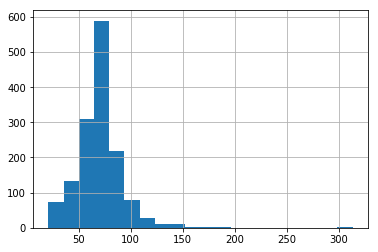

In [46]:
df.LotFrontage.hist(bins=20)

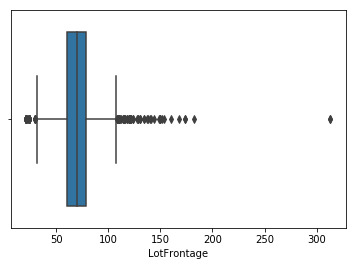

In [47]:
# Outlier Detection
sns.boxplot(df.LotFrontage)

#### LotArea

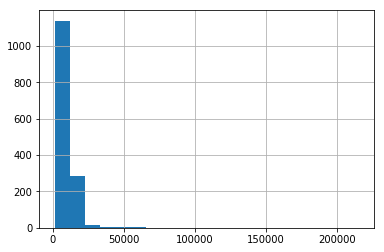

In [48]:
df.LotArea.hist(bins=20)

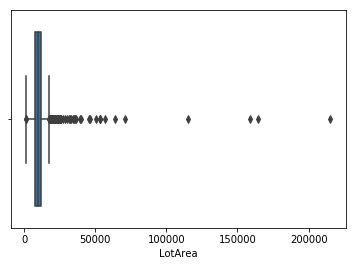

In [49]:
sns.boxplot(df.LotArea)

#### Street

In [50]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [51]:
# Dropping due to low variance in feature
df.drop('Street', axis=1, inplace=True)

#### LotShape

In [52]:
df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [53]:
df = dummify(data=df, dummify='LotShape', remove='IR3')

#### LandContour

In [54]:
df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [55]:
df = dummify(data=df, dummify='LandContour', remove='Low')

#### Utilities

In [56]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [57]:
# Dropping due to low variance
df.drop('Utilities', axis=1, inplace=True)

#### LotConfig

In [58]:
df.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

In [59]:
df = dummify(data=df, dummify='LotConfig', remove='FR3')

#### LandSlope

In [60]:
df.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [61]:
df = dummify(data=df, dummify='LandSlope', remove='Sev')

#### Neighborhood

In [62]:
df.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [63]:
df = dummify(data=df, dummify='Neighborhood', remove='Blueste')

#### Condition1

In [64]:
df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [65]:
df = dummify(data=df, dummify='Condition1', remove='RRNe')

#### Condition2

In [66]:
df.Condition2.value_counts()

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [67]:
# Dropping due to low variance
df.drop('Condition2', axis=1, inplace=True)

#### BldgType

In [68]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [69]:
df = dummify(data=df, dummify='BldgType', remove='2fmCon')

#### HouseStyle

In [70]:
df.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [71]:
df = dummify(data=df, dummify='HouseStyle', remove='2.5Fin')

#### YearBuilt

In [72]:
df.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
        ..
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3
1934     3
1989     3
1987     3
1912     3
1885     2
1892     2
1890     2
1942     2
1908     2
1882     1
1875     1
1893     1
2010     1
1898     1
1904     1
1905     1
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [73]:
df['Age'] = 2019 - df['YearBuilt']

In [74]:
df.drop('YearBuilt', axis=1, inplace=True)

#### YearRemodAdd

In [75]:
df.YearRemodAdd.value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
       ... 
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64

In [76]:
df['Years_since_remod'] = 2019 - df['YearRemodAdd']

In [77]:
df.drop('YearRemodAdd', axis=1, inplace=True)

#### RoofStyle

In [78]:
df.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

In [79]:
df = dummify(data=df, dummify='RoofStyle', remove='Shed')

#### RoofMatl

In [80]:
df.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

In [81]:
# droppping due to low variance
df.drop('RoofMatl', axis=1, inplace=True)

#### Exterior1st

In [82]:
df.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [83]:
df = dummify(data=df, dummify='Exterior1st', remove='AsphShn')

#### Exterior2nd

In [84]:
df.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [85]:
df = dummify(data=df, dummify='Exterior2nd', remove='CBlock')

#### MasVnrType

In [86]:
df.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [87]:
df = dummify(data=df, dummify='MasVnrType', remove='None')

#### MasVnrArea

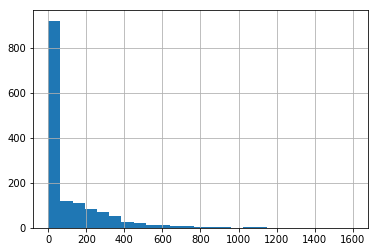

In [88]:
df.MasVnrArea.hist(bins=25)

#### ExterQual

In [89]:
df[['ExterQual']] = df[['ExterQual']].apply(lambda x: x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}))

#### ExterCond

In [90]:
df[['ExterCond']] = df[['ExterCond']].apply(lambda x: x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}))

#### Foundation

In [91]:
df.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

In [92]:
df = dummify(data=df, dummify='Foundation', remove='Wood')

#### BsmtQual & BsmtCond

In [93]:
df[['BsmtQual','BsmtCond']] = df[['BsmtQual','BsmtCond']].apply(lambda x: x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}))

#### BsmtExposure

In [94]:
df[['BsmtExposure']] = df[['BsmtExposure']].apply(lambda x: x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}))

#### BsmtFinType1

In [95]:
df[['BsmtFinType1']] = df[['BsmtFinType1']].apply(lambda x: x.map(
    {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}))

#### BsmtFinSF1

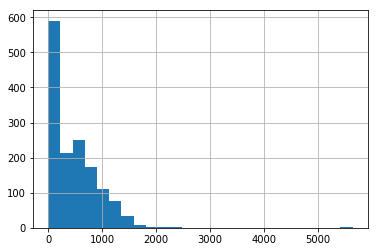

In [96]:
df.BsmtFinSF1.hist(bins=25)

#### BsmtFinType2

In [97]:
df[['BsmtFinType2']] = df[['BsmtFinType2']].apply(lambda x: x.map(
    {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}))

#### BsmtFinSF2

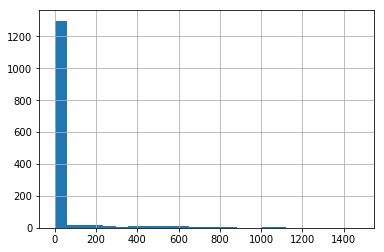

In [98]:
df.BsmtFinSF2.hist(bins=25)

#### TotalBsmtSF

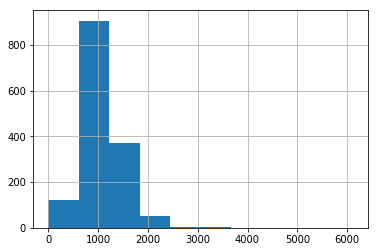

In [99]:
df.TotalBsmtSF.hist()

#### Heating

In [100]:
df.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [101]:
# Not much variance dropping the feature
df.drop('Heating', axis=1, inplace=True)

#### HeatingQC

In [102]:
df[['HeatingQC']] = df[['HeatingQC']].apply(lambda x: x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}))

#### CentralAir

In [103]:
df.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [104]:
df[['CentralAir']] = df[['CentralAir']].apply(lambda x: x.map({'Y':1,'N':0}))

#### Electrical

In [105]:
df.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [106]:
df = dummify(data=df, dummify='Electrical', remove='Mix')

#### 1stFlrSF

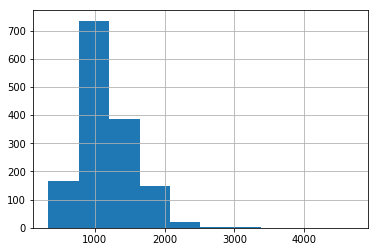

In [107]:
df['1stFlrSF'].hist()

#### 2ndFlrSF

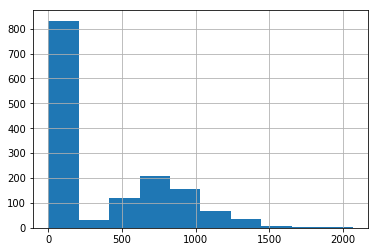

In [108]:
df['2ndFlrSF'].hist()

#### LowQualFinSF

In [109]:
df.LowQualFinSF.value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [110]:
# Dropping due to low variance
df.drop('LowQualFinSF', axis=1, inplace=True)

#### GrLivArea

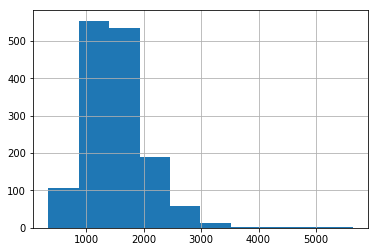

In [111]:
df.GrLivArea.hist()

#### BsmtFullBath

In [112]:
df.BsmtFullBath.value_counts()

0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

#### BsmtHalfBath

In [113]:
df.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

#### FullBath

In [114]:
df.FullBath.value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

#### HalfBath

In [115]:
df.HalfBath.value_counts()

0    913
1    535
2     12
Name: HalfBath, dtype: int64

#### Bedroom

In [116]:
df.BedroomAbvGr.value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

#### Kitchen

In [117]:
df.KitchenAbvGr.value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

#### KitchenQual

In [118]:
df[['KitchenQual']] = df[['KitchenQual']].apply(lambda x: x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}))

#### TotRmsAbvGrd

In [119]:
df.TotRmsAbvGrd.value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

#### Functional

In [120]:
df[['Functional']] = df[['Functional']].apply(lambda x: x.map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2 ,'Sev':1 ,'Sal':0 }))

#### Fireplaces

In [121]:
df.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

#### FireplaceQu

In [122]:
df[['FireplaceQu']] = df[['FireplaceQu']].apply(lambda x: x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}))

#### GarageType

In [123]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [124]:
df = dummify(data=df, dummify='GarageType', remove='2Types')

#### GarageYrBlt

In [125]:
df['Garage_Age'] = 2019 - df['GarageYrBlt']

#### GarageFinish

In [126]:
df[['GarageFinish']] = df[['GarageFinish']].apply(lambda x: x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0}))

#### GarageQual

In [127]:
df[['GarageQual']] = df[['GarageQual']].apply(lambda x: x.map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}))

#### GarageCond

In [128]:
df[['GarageCond']] = df[['GarageCond']].apply(lambda x: x.map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}))

#### PavedDrive

In [129]:
df[['PavedDrive']] = df[['PavedDrive']].apply(lambda x: x.map(
    {'Y':3,'P':2,'N':1}))

#### WoodDeckSF

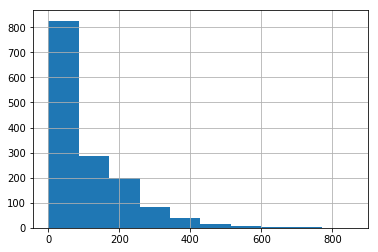

In [130]:
df.WoodDeckSF.hist()

#### PoolQC

In [131]:
df[['PoolQC']] = df[['PoolQC']].apply(lambda x: x.map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'NA':0}))

#### Fence

In [132]:
df[['Fence']] = df[['Fence']].apply(lambda x: x.map(
    {'GdPrv':5,'MnPrv':4,'GdWo':3,'MnWw':2,'NA':1}))

#### MiscFeature

In [133]:
df.MiscFeature.value_counts()

NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [134]:
df = dummify(data=df, dummify='MiscFeature', remove='NA')

##### MoSold & YrSold

In [135]:
df.MoSold = df.MoSold/12

In [136]:
df['Year_since_sold'] =  (2019 - df.YrSold) + df.MoSold

In [137]:
df.drop(['MoSold','YrSold'], axis=1, inplace=True)

#### SaleCondition

In [138]:
df.SaleCondition.value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [139]:
df = dummify(data=df, dummify='SaleCondition', remove='AdjLand')

#### SaleType

In [140]:
df.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [141]:
df = dummify(data=df, dummify='SaleType', remove='Con')

In [142]:
len(df.columns)

182

## Model Building

In [143]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [144]:
y = df.pop('SalePrice')

In [145]:
X = df

In [146]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.85,
                                                    test_size = 0.15, random_state=100)

## Lasso

In [147]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5

In [148]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [149]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.078191,0.004305,0.000798,3.988984e-04,0.0001,{'alpha': 0.0001},-21572.666326,-41155.373180,-21032.090719,-19912.953593,-22220.188659,-25175.748784,8021.542762,28,-17273.197958,-16130.672538,-15221.055061,-17314.521747,-17551.893913,-16698.268243,888.066778
1,0.078989,0.004203,0.000798,3.990889e-04,0.001,{'alpha': 0.001},-21572.749782,-41155.102225,-21031.972757,-19912.946032,-22220.033082,-25175.655207,8021.451999,27,-17273.189590,-16130.653453,-15221.054770,-17314.525873,-17551.900622,-16698.264862,888.070093
2,0.080584,0.005864,0.000599,4.886945e-04,0.01,{'alpha': 0.01},-21573.584227,-41152.391147,-21030.793350,-19912.870431,-22218.477655,-25174.719221,8020.543764,26,-17273.106092,-16130.462448,-15221.051962,-17314.600815,-17551.967738,-16698.237811,888.107941
3,0.078390,0.005697,0.000998,3.989506e-07,0.05,{'alpha': 0.05},-21573.896553,-41140.309530,-21026.965637,-19912.534613,-22211.575261,-25170.156110,8016.653969,25,-17272.733183,-16129.833576,-15221.165643,-17315.025943,-17552.266829,-16698.205035,888.218853
4,0.081377,0.003863,0.000798,3.989697e-04,0.1,{'alpha': 0.1},-21573.474152,-41125.703773,-21022.750815,-19911.681146,-22203.000795,-25164.426207,8012.057378,24,-17272.320366,-16129.204116,-15221.330459,-17315.611536,-17552.957164,-16698.284728,888.405418


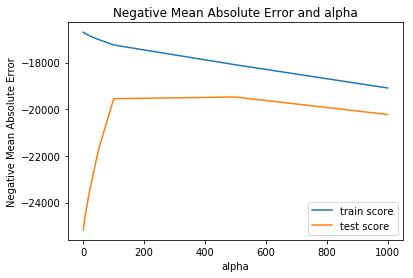

In [150]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [151]:
cv_results.loc[cv_results['rank_test_score']==1,:]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
26,0.060239,0.012998,0.000798,0.000399,500.0,{'alpha': 500},-20991.615308,-18267.328569,-19961.287979,-19175.503167,-18981.155124,-19476.599816,931.065602,1,-18142.23987,-18799.69308,-17057.041962,-18180.572315,-18288.278176,-18093.565081,569.359221


In [152]:
# Alpha 500 was the optimal value found using grid search CV
alpha = 500

In [153]:
# Lets Fine Tune this value
params = {'alpha': np.linspace(50, 950, 10)}

In [154]:
lasso1 = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso1, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([ 50., 150., 250., 350., 450., 550., 650., 750., 850., 950.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

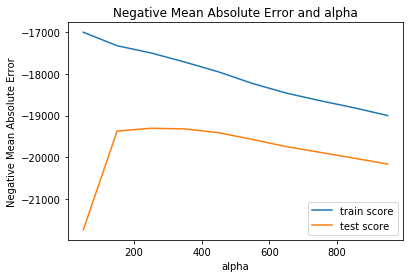

In [155]:
# plotting mean test and train scoes with alpha 
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [156]:
cv_results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
2,0.070611,0.011958,0.000998,6.309772e-04,250.0,{'alpha': 250.0},-20741.581777,-18342.829318,-19612.511463,-18914.382690,-18896.496943,-19302.720810,825.724642,1,-17646.245427,-18271.046683,-16148.609505,-17619.658786,-17835.600712,-17504.232223,716.800319
3,0.073404,0.005698,0.000399,4.885776e-04,350.0,{'alpha': 350.0},-20664.628774,-18222.653262,-19705.257891,-19033.480961,-18962.680949,-19318.825693,821.577982,2,-17856.161838,-18449.039804,-16447.328977,-17859.253349,-17995.485802,-17721.453954,673.053336
1,0.072207,0.004487,0.000599,4.886945e-04,150.0,{'alpha': 150.0},-20753.865204,-18664.925097,-19561.257522,-18722.929935,-19142.360949,-19370.183614,764.810499,3,-17487.400359,-18127.998048,-15914.586421,-17388.032178,-17740.180680,-17331.639537,753.203006
4,0.069614,0.011991,0.000798,3.991604e-04,450.0,{'alpha': 450.0},-20841.159863,-18245.042423,-19847.967613,-19147.653021,-18957.855756,-19409.090630,880.403324,4,-18025.244995,-18677.976722,-16846.516815,-18068.031378,-18163.856897,-17956.325361,602.121779
5,0.059241,0.010453,0.000798,3.989697e-04,550.0,{'alpha': 550.0},-21164.412385,-18294.969290,-20106.219165,-19241.286279,-19035.557660,-19569.774954,985.434036,5,-18267.005818,-18906.256935,-17279.863718,-18283.251778,-18425.463571,-18232.368364,529.616001
6,0.055053,0.011447,0.000200,3.991127e-04,650.0,{'alpha': 650.0},-21363.575540,-18246.447319,-20455.499034,-19416.581538,-19218.243945,-19741.377699,1073.446608,6,-18444.127458,-19072.879492,-17589.365293,-18530.058732,-18676.752594,-18462.636714,486.977033
7,0.054654,0.011586,0.000598,4.885391e-04,750.0,{'alpha': 750.0},-21497.523427,-18208.840021,-20676.410445,-19616.796794,-19381.912512,-19877.603027,1128.377733,7,-18579.224951,-19270.324202,-17767.790744,-18712.984491,-18888.148611,-18643.694600,495.698984
8,0.052060,0.009106,0.000798,3.990889e-04,850.0,{'alpha': 850.0},-21602.871124,-18247.323512,-20885.481920,-19803.918243,-19535.743660,-20016.347147,1156.093773,8,-18717.982175,-19475.630907,-17902.722534,-18866.674847,-19101.741027,-18812.950298,522.104497
9,0.050464,0.008382,0.000598,4.884611e-04,950.0,{'alpha': 950.0},-21738.772097,-18368.051463,-21077.560601,-19925.377374,-19671.660186,-20157.559516,1169.918253,9,-18935.541101,-19692.600335,-18036.198277,-18990.786162,-19338.544738,-18998.734123,552.712106
0,0.080185,0.011241,0.000998,3.568323e-07,50.0,{'alpha': 50.0},-21077.569375,-28701.819734,-20048.050136,-18966.863475,-19862.813121,-21730.896291,3547.764411,10,-17311.522110,-17182.299352,-15578.905465,-17293.334256,-17683.272942,-17009.866825,735.147452


alpha = 250 is best here.

In [157]:
# Lets Fine Tune this value again
params = {'alpha': np.linspace(200, 300, 21)}

In [158]:
lasso2 = Lasso()

# cross validation
model_cv2 = GridSearchCV(estimator = lasso2, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([200., 205., 210., 215., 220., 225., 230., 235., 240., 245., 250.,
       255., 260., 265., 270., 275., 280., 285., 290., 295., 300.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

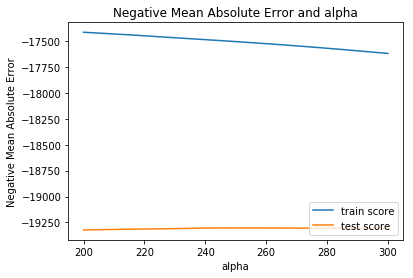

In [159]:
# plotting mean test and train scoes with alpha 
cv_results = pd.DataFrame(model_cv2.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [160]:
cv_results.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,0.070410,0.011016,0.000799,3.997484e-04,255.0,{'alpha': 255.0},-20740.441848,-18333.971047,-19618.703084,-18920.845360,-18893.505619,-19302.652899,827.553258,1,-17657.654581,-18277.721075,-16160.439512,-17631.101547,-17842.884551,-17513.960253,715.249652
10,0.071409,0.011743,0.000997,1.784161e-07,250.0,{'alpha': 250.0},-20741.581777,-18342.829318,-19612.511463,-18914.382690,-18896.496943,-19302.720810,825.724642,2,-17646.245427,-18271.046683,-16148.609505,-17619.658786,-17835.600712,-17504.232223,716.800319
9,0.070810,0.011476,0.000997,4.101908e-07,245.0,{'alpha': 245.0},-20744.103644,-18346.349534,-19606.853353,-18908.344374,-18902.915793,-19302.875620,825.316254,3,-17635.307630,-18263.787653,-16136.842420,-17608.600225,-17829.065020,-17494.720590,718.305890
12,0.067818,0.010422,0.000598,4.885778e-04,260.0,{'alpha': 260.0},-20739.304629,-18325.534498,-19625.646949,-18927.906783,-18892.163625,-19303.269390,829.160799,4,-17669.791878,-18284.771352,-16172.793371,-17642.676363,-17851.376555,-17524.281904,713.729188
8,0.064427,0.009369,0.000998,1.907349e-07,240.0,{'alpha': 240.0},-20746.709220,-18353.238016,-19601.892159,-18902.306026,-18910.767834,-19304.146008,824.104573,5,-17624.210021,-18257.414129,-16124.312460,-17597.810092,-17822.733341,-17485.296009,720.314249
13,0.068223,0.011158,0.000593,4.843551e-04,265.0,{'alpha': 265.0},-20738.251198,-18317.097917,-19631.611215,-18935.030360,-18893.025970,-19304.159857,830.533890,6,-17682.539367,-18292.568432,-16185.128721,-17655.231323,-17857.622082,-17534.617985,712.231720
17,0.070810,0.007517,0.000998,2.861023e-07,285.0,{'alpha': 285.0},-20723.654896,-18280.541398,-19648.871940,-18964.831578,-18900.583519,-19304.840871,832.458181,7,-17730.738499,-18336.869821,-16238.509580,-17709.414112,-17887.404206,-17580.587244,708.013305
16,0.073602,0.002770,0.000798,3.990892e-04,280.0,{'alpha': 280.0},-20727.248146,-18290.498271,-19644.026787,-18957.434443,-18899.270620,-19304.842755,831.592286,8,-17717.917707,-18326.368354,-16223.900900,-17695.964209,-17878.354258,-17568.501086,709.491877
15,0.075597,0.004522,0.000798,3.989938e-04,275.0,{'alpha': 275.0},-20730.839465,-18300.224552,-19639.181519,-18950.037444,-18898.769674,-19304.960433,830.747312,9,-17705.600874,-18314.422776,-16210.411890,-17682.518602,-17870.790197,-17556.748868,710.392837
14,0.060832,0.014110,0.000798,3.991366e-04,270.0,{'alpha': 270.0},-20735.580174,-18308.661295,-19634.918326,-18942.541132,-18897.966627,-19305.087134,830.736855,10,-17694.302440,-18302.648872,-16197.475388,-17668.930385,-17864.540475,-17545.579512,711.281771


Optimal value of lambda for lasso is 255

In [161]:
alpha = 255

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train, y_train)

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=255, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [162]:
predictors = list(lasso3.coef_)

In [163]:
predictors = [x==0 for x in predictors]

In [164]:
columns = [x for x in df.columns]

In [165]:
pred = pd.DataFrame({'Features': columns,'select':predictors})

In [166]:
pred.head()

,Features,select
0,MSSubClass,False
1,LotFrontage,False
2,LotArea,False
3,OverallQual,False
4,OverallCond,False


In [167]:
pred = list(pred.loc[pred['select']==True,'Features'])

In [168]:
# List of features that lasso suggests to use in our model
print(pred)

['BsmtFinType2', 'CentralAir', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'GarageQual', 'PavedDrive', 'PoolQC', 'FV_MSZoning', 'RH_MSZoning', 'RL_MSZoning', 'IR1_LotShape', 'IR2_LotShape', 'Reg_LotShape', 'HLS_LandContour', 'Lvl_LandContour', 'Corner_LotConfig', 'FR2_LotConfig', 'Inside_LotConfig', 'Gtl_LandSlope', 'Blmngtn_Neighborhood', 'BrDale_Neighborhood', 'ClearCr_Neighborhood', 'Gilbert_Neighborhood', 'IDOTRR_Neighborhood', 'MeadowV_Neighborhood', 'Mitchel_Neighborhood', 'NPkVill_Neighborhood', 'NWAmes_Neighborhood', 'SWISU_Neighborhood', 'SawyerW_Neighborhood', 'Sawyer_Neighborhood', 'Timber_Neighborhood', 'Veenker_Neighborhood', 'Artery_Condition1', 'PosA_Condition1', 'PosN_Condition1', 'RRAe_Condition1', 'RRAn_Condition1', 'RRNn_Condition1', '1Fam_BldgType', 'Duplex_BldgType', 'TwnhsE_BldgType', 'Twnhs_BldgType', '1.5Fin_HouseStyle', '1.5Unf_HouseStyle', '2.5Unf_HouseStyle', 'SFoyer_HouseStyle', 'SLvl_HouseStyle', 'Flat_RoofStyle', 'Gambrel_RoofStyle', 'Mansard_RoofStyle', '

## Ridge Regression

In [169]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished
C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

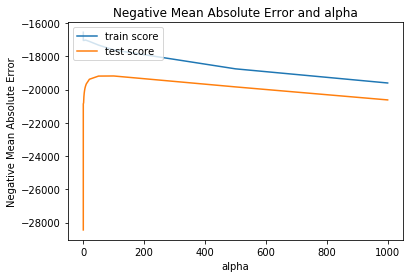

In [170]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [181]:
cv_results.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
16,0.003391,4.888112e-04,0.000000,0.000000e+00,80,{'alpha': 80.0},-20335.175837,-18524.416201,-19468.709742,-18506.934039,-18973.809453,-19162.754555,684.851561,1,-17491.792014,-18248.253932,-16292.797869,-17559.949397,-17938.357230,-17506.230088,665.258630
15,0.003391,4.885777e-04,0.000598,4.885777e-04,75,{'alpha': 75.0},-20327.294707,-18543.308227,-19450.676614,-18510.907377,-18977.954343,-19162.967227,676.083948,2,-17463.705052,-18217.956209,-16257.235776,-17535.819487,-17911.924995,-17477.328304,667.777892
17,0.003590,7.976294e-04,0.000000,0.000000e+00,85,{'alpha': 85.0},-20342.151583,-18504.779335,-19491.203014,-18506.850533,-18970.319857,-19164.010978,693.208707,3,-17518.575422,-18275.334756,-16326.554257,-17585.040426,-17964.248318,-17533.950636,662.640036
14,0.002992,3.234067e-07,0.000997,1.907349e-07,70,{'alpha': 70.0},-20320.094888,-18561.240358,-19436.250387,-18519.292930,-18985.921596,-19165.491164,667.073891,4,-17436.175434,-18184.859077,-16221.908855,-17511.969199,-17883.420340,-17447.666581,669.340420
18,0.002992,1.168008e-07,0.000199,3.989220e-04,90,{'alpha': 90.0},-20350.748030,-18484.611348,-19512.680156,-18511.355904,-18973.137213,-19167.460794,701.074561,5,-17545.793541,-18300.480288,-16359.734067,-17609.205840,-17989.820982,-17561.006944,659.744407


Optimal lambda for Ridge Regression is 80

In [183]:
alpha = 80

ridge2 = Ridge(alpha=alpha)
        
ridge2.fit(X_train, y_train)

Ridge(alpha=80, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [187]:
y_pred = ridge2.predict(X_test)

In [186]:
from sklearn.metrics import r2_score

In [188]:
r2_score(y_pred, y_test)

0.8600074861902925

In [189]:
alpha = 255

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train, y_train)

C:\Users\Elysium\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=255, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [190]:
y_pred = lasso3.predict(X_test)

In [191]:
r2_score(y_pred, y_test)

0.8664010721474054